# Coco Dataset Visulation

### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

In [2]:
# visualize images 

dataDir='/mnt/BA5672185671D59B/RCNN/object_detection/data/objects'
dataType='output'
mul_dataType='output'
annFile='{}/{}.json'.format(dataDir, dataType)
print(annFile)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/mnt/BA5672185671D59B/RCNN/object_detection/data/objects/vehicles_updated"

/mnt/BA5672185671D59B/RCNN/object_detection/data/objects/output.json


# Initialize the COCO API

In [3]:
# initialize coco api for instance annotations
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


# Display damage categories and supercategories

In [6]:
# display categories and supercategories
#Multi Class 

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
category_ids = mul_coco.loadCats(mul_coco.getCatIds())

print(category_ids)

# mul_nms=[cat['name'] for cat in mul_cats]
# print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

# mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
# print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

[{'supercategory': 'none', 'id': 1, 'name': 'bus'}, {'supercategory': 'none', 'id': 2, 'name': 'car'}, {'supercategory': 'none', 'id': 3, 'name': 'motorbike'}]


In [6]:
# get all images containing 'damage' category, select one at random
catIds = mul_coco.getCatIds(catNms=['damage']);
imgIds = mul_coco.getImgIds(catIds=catIds );

In [7]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

Dipto_611 image id was selected at random from the ['107', '108', '109', '112', '116', '117', '193', '195', '196', '199', '201', '202', '203', '204', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '232', '233', '234', '235', '236', '237', '238', 'Asraf_01', 'Asraf_02', 'Asraf_03', 'Asraf_04', 'Asraf_05', 'Asraf_06', 'Asraf_07', 'Asraf_08', 'Asraf_09', 'Asraf_10', 'Asraf_11', 'Asraf_12', 'Asraf_13', 'Asraf_14', 'Asraf_15', 'Asraf_16', 'Asraf_17', 'Asraf_18', 'Asraf_19', 'Asraf_20', 'Asraf_21', 'Asraf_22', 'Asraf_23', 'Asraf_24', 'Asraf_25', 'Asraf_26', 'Asraf_27', 'Asraf_28', 'Asraf_29', 'Asraf_30', 'Asraf_31', 'Asraf_32', 'Asraf_33', 'Asraf_34', 'Asraf_35', 'Asraf_36', 'Asraf_37', 'Asraf_38', 'Asraf_39', 'Asraf_40', 'Asraf_41', 'Asraf_42', 'Asraf_43', 'Asraf_44', 'Asraf_45', 'Asraf_46', 'Asraf_47', 'Asraf_48', 'Asraf_49', 'Asraf_53', 'Asraf_54', 'Asraf_55', 'A

In [9]:
# Load the image
imgId = mul_coco.getImgIds(imgIds = [random_img_id])
img = mul_coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'file_name': 'Dipto_611.jpg', 'height': 1080, 'width': 1920, 'id': 'Dipto_611'}


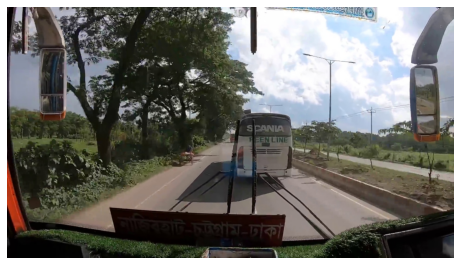

In [10]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [11]:
#get annotations
annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = mul_coco.loadAnns(annIds)

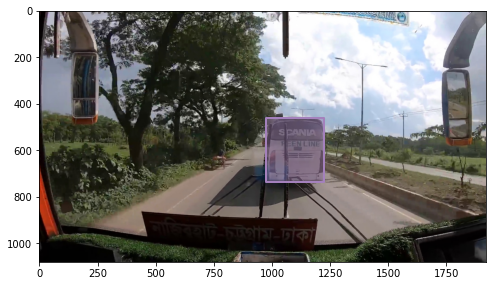

In [12]:
#Plot objects
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(anns, draw_bbox=True )

In [13]:
#get object annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [14]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [15]:
category_map

{1: 'bus', 2: 'car', 3: 'motorbike'}

Parts are: ['bus']


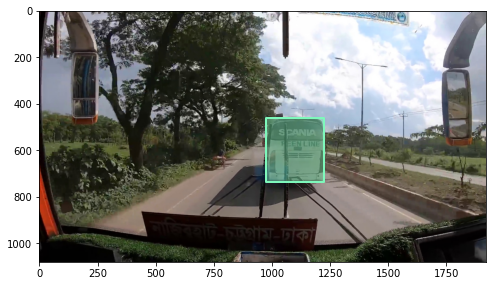

In [16]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Objects are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )